<a href="https://colab.research.google.com/github/yeelvis/Bank-Marketing-Campaign/blob/main/Bank_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Campaign

Dataset provided by Kaggle:
https://www.kaggle.com/datasets/yaminh/bank-marketing-campaign-dataset/data


In [1]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset from github repo
github_link = 'https://raw.githubusercontent.com/yeelvis/Bank-Marketing-Campaign/main/dataset.csv'
df = pd.read_csv(github_link)

In [6]:
# basic information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


### Clean and Transform the data

Check for any null value and duplicates. Transform the dataset.

In [12]:

# scan for any missing values
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

In [15]:
df[df.duplicated()==True]

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
24557,service_worker,34,high_school,married,unidentified,May,28,124,1,unidentified,not_converted
28501,manual_worker,39,elementary_school,married,unidentified,June,19,112,4,unidentified,not_converted
34863,technical_specialist,32,college,single,mobile,August,8,31,2,unidentified,not_converted
35524,administrative_staff,29,high_school,single,unidentified,June,2,121,4,unidentified,not_converted
38395,executive,36,college,married,mobile,August,8,75,2,unidentified,not_converted
41488,manual_worker,36,high_school,married,mobile,July,9,183,1,unidentified,not_converted


In [22]:
df.duplicated().sum()

6

In [23]:
df.drop_duplicates(inplace=True)

### Data Visualization & Exploration

In [25]:
df.columns

Index(['occupation', 'age', 'education_level', 'marital_status',
       'communication_channel', 'call_month', 'call_day', 'call_duration',
       'call_frequency', 'previous_campaign_outcome', 'conversion_status'],
      dtype='object')

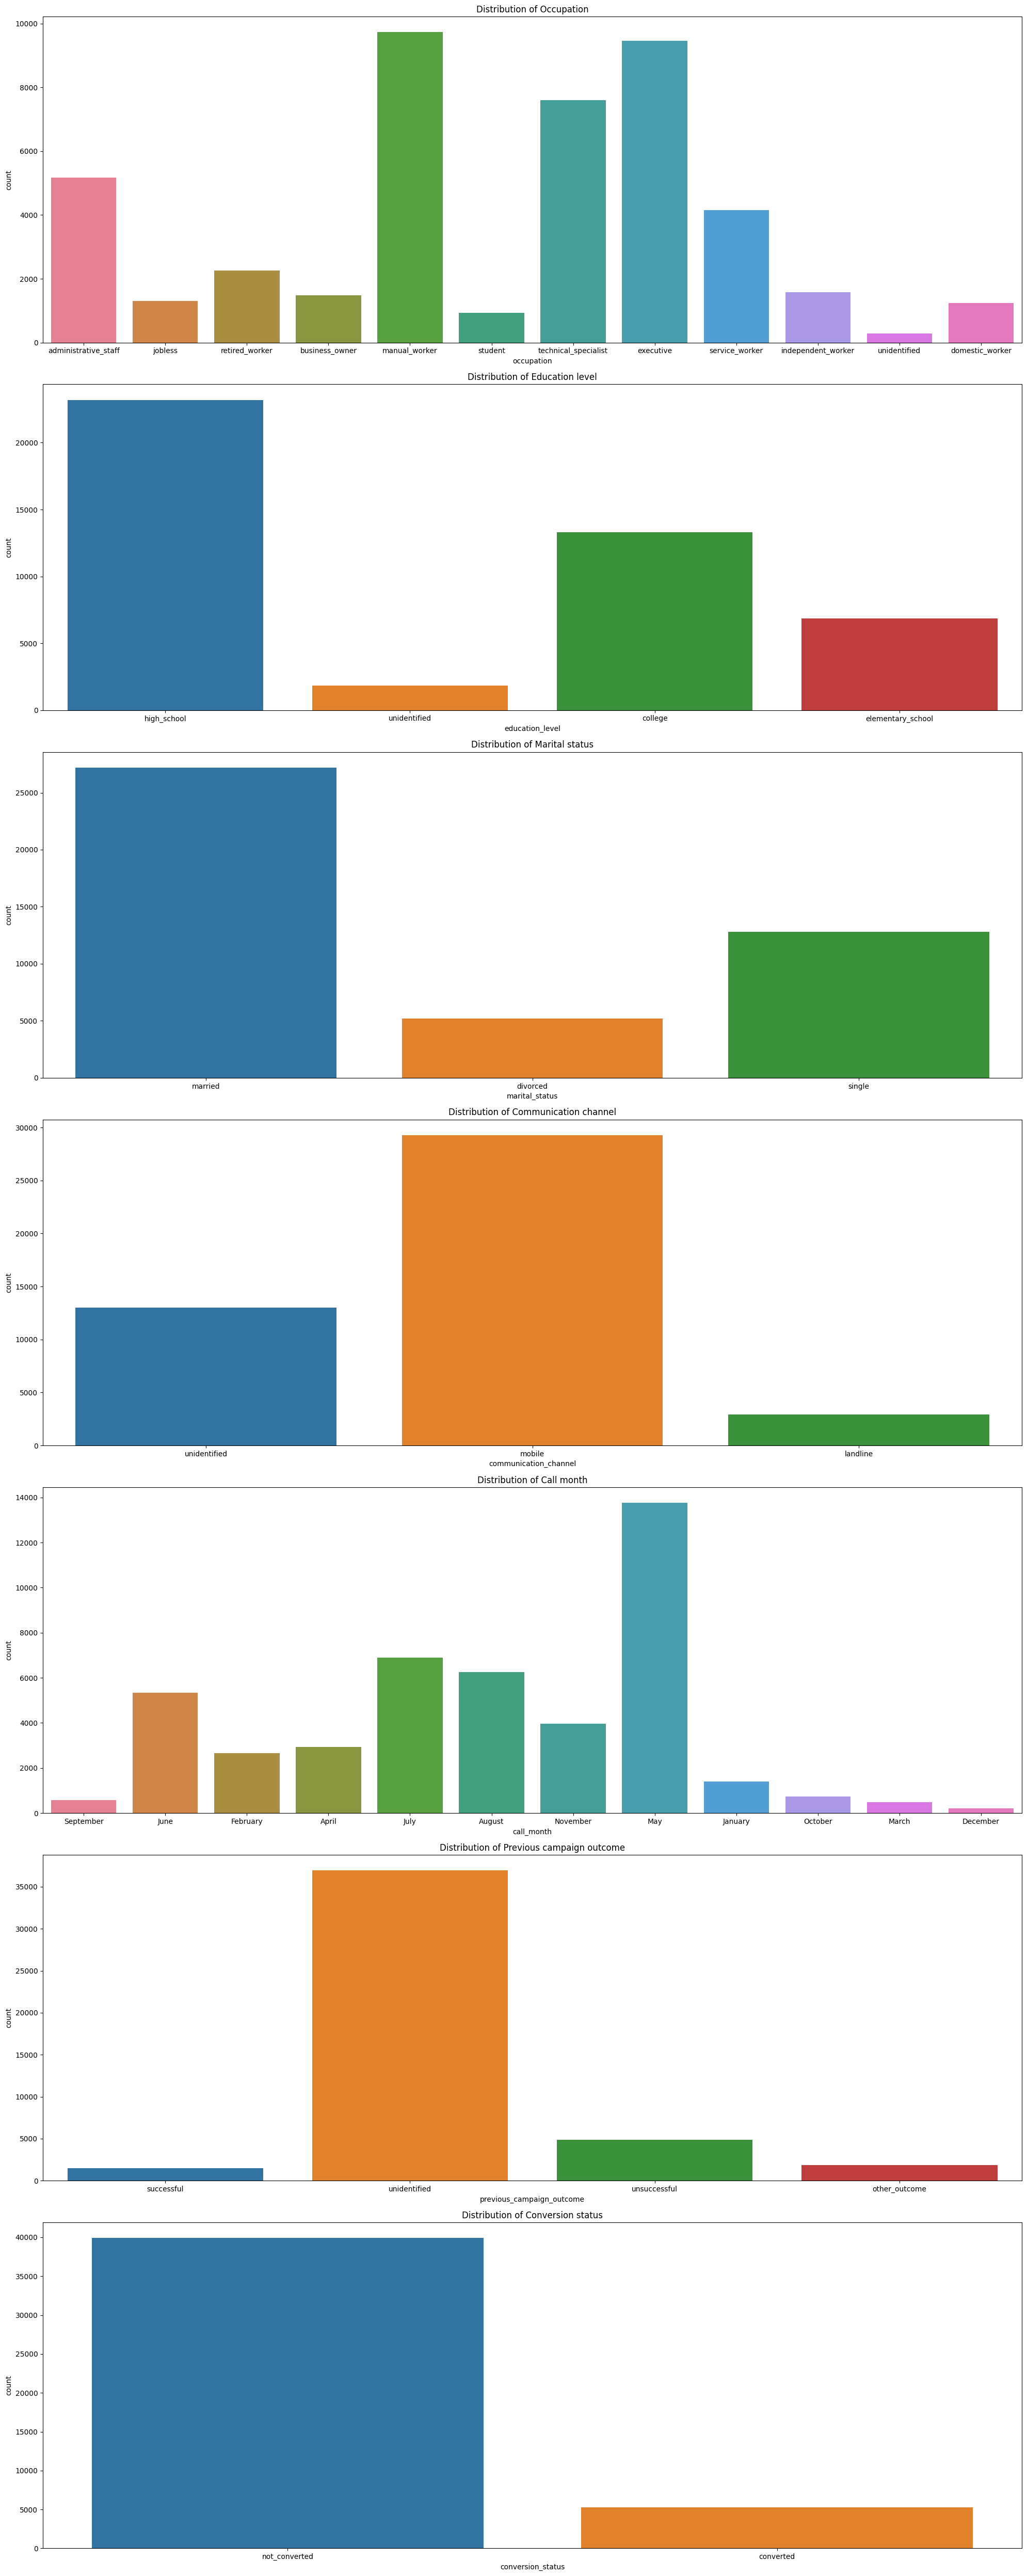

In [38]:
# initial insight on categorical datas

cat_columns = ['occupation', 'education_level', 'marital_status',
                'communication_channel', 'call_month', 'previous_campaign_outcome',
                'conversion_status']

fig, axes = plt.subplots(7, 1, figsize=(20, 50))

for index, col in enumerate(cat_columns):
    sns.countplot(data= df, x= col, ax = axes[index], hue=col)
    axes[index].set_title(f'Distribution of {col.capitalize().replace("_", " ")}')

plt.tight_layout()
plt.show()

array([ 0., 11., 22., 33., 44., 55., 66., 77., 88., 99.])